In [43]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

import math

from scipy import stats
import scipy as sci

import random

In [2]:
df = pd.read_csv('data\GSM1586785_ScrH-12A_Exd_14mer_cg.csv')

We visualize the dataframe

In [3]:
df

,Unnamed: 0,Kmer,y_1,y_2,y_3,y_4,y_5,y_6,zC_1,zC_2,...,zW_76,zW_77,zW_78,y_79,y_80,y_81,y_82,y_83,y_84,relKa
0,0,AATGATTAATTACC,0.593697,-1.092779,0.309117,0.133525,0.023403,-0.157348,1.177586,-2.166888,...,-0.674709,10.019444,-1.012806,-0.790300,-0.112492,0.118705,0.237596,-0.009713,0.267886,1.000000
1,1,GGTAATTAATCATT,0.790300,-0.112492,0.118705,-0.237596,-0.009713,0.267886,2.591673,-3.422281,...,-0.986852,9.851130,-1.990198,-0.593697,-1.092779,0.309117,-0.133525,0.023403,-0.157348,1.000000
2,2,AATGATTAATTACT,0.593690,-1.092780,0.309116,0.133525,0.023403,-0.157348,1.177587,-2.166890,...,-0.839165,10.065669,-1.499679,-0.826872,-1.141872,0.500342,-0.143809,0.043456,0.095141,0.968830
3,3,AGTAATTAATCATT,0.826872,-1.141872,0.500342,0.143809,0.043456,0.095141,2.137980,-2.777053,...,-0.986851,9.851129,-1.990198,-0.593690,-1.092780,0.309116,-0.133525,0.023403,-0.157348,0.968830
4,4,AGGTAATTAATCAT,1.260372,-0.870861,0.397555,0.124897,0.053255,0.213696,1.977567,-2.851909,...,-0.960712,9.943948,-1.806082,0.336528,-0.596511,0.184099,-0.075285,0.032807,0.149085,0.968752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170576,170576,AAATAAATCAAAAA,0.876056,-1.165222,0.321638,0.106295,0.028863,-0.202603,1.139074,-1.939220,...,-0.779331,9.794168,-1.737971,0.085539,-0.955026,0.025427,0.256477,0.048950,0.080873,0.076591
170577,170577,TAATTGTTTTTTTT,0.585035,-0.150802,0.171198,-0.256918,0.058377,0.181906,1.209817,-3.391274,...,-1.162514,9.929123,-1.934750,-1.023253,-0.926061,0.372899,-0.098051,0.026279,-0.269782,0.073354
170578,170578,AAAAAAAACAATTA,1.023253,-0.926061,0.372899,0.098051,0.026279,-0.269782,1.151259,-1.899359,...,-0.832287,9.702945,-1.787255,-0.585035,-0.150802,0.171198,0.256918,0.058377,0.181906,0.073354
170579,170579,TTATTTTTTTAATT,-0.413908,-0.828290,0.190382,-0.246474,0.039222,0.122640,0.331353,-3.875098,...,-0.978912,9.863057,-1.994680,-0.735610,-1.194044,0.298711,-0.138674,0.028309,-0.129401,0.073150


In [4]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [5]:
df

,Kmer,y_1,y_2,y_3,y_4,y_5,y_6,zC_1,zC_2,zC_3,...,zW_76,zW_77,zW_78,y_79,y_80,y_81,y_82,y_83,y_84,relKa
0,AATGATTAATTACC,0.593697,-1.092779,0.309117,0.133525,0.023403,-0.157348,1.177586,-2.166888,-1.059702,...,-0.674709,10.019444,-1.012806,-0.790300,-0.112492,0.118705,0.237596,-0.009713,0.267886,1.000000
1,GGTAATTAATCATT,0.790300,-0.112492,0.118705,-0.237596,-0.009713,0.267886,2.591673,-3.422281,-1.331358,...,-0.986852,9.851130,-1.990198,-0.593697,-1.092779,0.309117,-0.133525,0.023403,-0.157348,1.000000
2,AATGATTAATTACT,0.593690,-1.092780,0.309116,0.133525,0.023403,-0.157348,1.177587,-2.166890,-1.059703,...,-0.839165,10.065669,-1.499679,-0.826872,-1.141872,0.500342,-0.143809,0.043456,0.095141,0.968830
3,AGTAATTAATCATT,0.826872,-1.141872,0.500342,0.143809,0.043456,0.095141,2.137980,-2.777053,-1.371144,...,-0.986851,9.851129,-1.990198,-0.593690,-1.092780,0.309116,-0.133525,0.023403,-0.157348,0.968830
4,AGGTAATTAATCAT,1.260372,-0.870861,0.397555,0.124897,0.053255,0.213696,1.977567,-2.851909,-1.221460,...,-0.960712,9.943948,-1.806082,0.336528,-0.596511,0.184099,-0.075285,0.032807,0.149085,0.968752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170576,AAATAAATCAAAAA,0.876056,-1.165222,0.321638,0.106295,0.028863,-0.202603,1.139074,-1.939220,-0.782830,...,-0.779331,9.794168,-1.737971,0.085539,-0.955026,0.025427,0.256477,0.048950,0.080873,0.076591
170577,TAATTGTTTTTTTT,0.585035,-0.150802,0.171198,-0.256918,0.058377,0.181906,1.209817,-3.391274,-1.164594,...,-1.162514,9.929123,-1.934750,-1.023253,-0.926061,0.372899,-0.098051,0.026279,-0.269782,0.073354
170578,AAAAAAAACAATTA,1.023253,-0.926061,0.372899,0.098051,0.026279,-0.269782,1.151259,-1.899359,-0.775374,...,-0.832287,9.702945,-1.787255,-0.585035,-0.150802,0.171198,0.256918,0.058377,0.181906,0.073354
170579,TTATTTTTTTAATT,-0.413908,-0.828290,0.190382,-0.246474,0.039222,0.122640,0.331353,-3.875098,-2.096984,...,-0.978912,9.863057,-1.994680,-0.735610,-1.194044,0.298711,-0.138674,0.028309,-0.129401,0.073150


In [6]:
df.drop(columns = 'Kmer', inplace = True)
df

,y_1,y_2,y_3,y_4,y_5,y_6,zC_1,zC_2,zC_3,zC_4,...,zW_76,zW_77,zW_78,y_79,y_80,y_81,y_82,y_83,y_84,relKa
0,0.593697,-1.092779,0.309117,0.133525,0.023403,-0.157348,1.177586,-2.166888,-1.059702,-0.986852,...,-0.674709,10.019444,-1.012806,-0.790300,-0.112492,0.118705,0.237596,-0.009713,0.267886,1.000000
1,0.790300,-0.112492,0.118705,-0.237596,-0.009713,0.267886,2.591673,-3.422281,-1.331358,-0.674709,...,-0.986852,9.851130,-1.990198,-0.593697,-1.092779,0.309117,-0.133525,0.023403,-0.157348,1.000000
2,0.593690,-1.092780,0.309116,0.133525,0.023403,-0.157348,1.177587,-2.166890,-1.059703,-0.986851,...,-0.839165,10.065669,-1.499679,-0.826872,-1.141872,0.500342,-0.143809,0.043456,0.095141,0.968830
3,0.826872,-1.141872,0.500342,0.143809,0.043456,0.095141,2.137980,-2.777053,-1.371144,-0.839165,...,-0.986851,9.851129,-1.990198,-0.593690,-1.092780,0.309116,-0.133525,0.023403,-0.157348,0.968830
4,1.260372,-0.870861,0.397555,0.124897,0.053255,0.213696,1.977567,-2.851909,-1.221460,-0.880962,...,-0.960712,9.943948,-1.806082,0.336528,-0.596511,0.184099,-0.075285,0.032807,0.149085,0.968752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170576,0.876056,-1.165222,0.321638,0.106295,0.028863,-0.202603,1.139074,-1.939220,-0.782830,-1.156945,...,-0.779331,9.794168,-1.737971,0.085539,-0.955026,0.025427,0.256477,0.048950,0.080873,0.076591
170577,0.585035,-0.150802,0.171198,-0.256918,0.058377,0.181906,1.209817,-3.391274,-1.164594,-0.832287,...,-1.162514,9.929123,-1.934750,-1.023253,-0.926061,0.372899,-0.098051,0.026279,-0.269782,0.073354
170578,1.023253,-0.926061,0.372899,0.098051,0.026279,-0.269782,1.151259,-1.899359,-0.775374,-1.162514,...,-0.832287,9.702945,-1.787255,-0.585035,-0.150802,0.171198,0.256918,0.058377,0.181906,0.073354
170579,-0.413908,-0.828290,0.190382,-0.246474,0.039222,0.122640,0.331353,-3.875098,-2.096984,-0.362874,...,-0.978912,9.863057,-1.994680,-0.735610,-1.194044,0.298711,-0.138674,0.028309,-0.129401,0.073150


We plot the distribution of the label

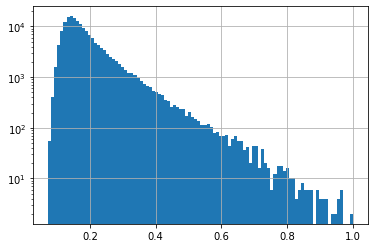

In [7]:
df.relKa.hist(bins=100)
plt.yscale('log')
plt.show()

The distribution is very skewed (it can be seen without the log y axes)

### Features exploration

We want to plot the features too.

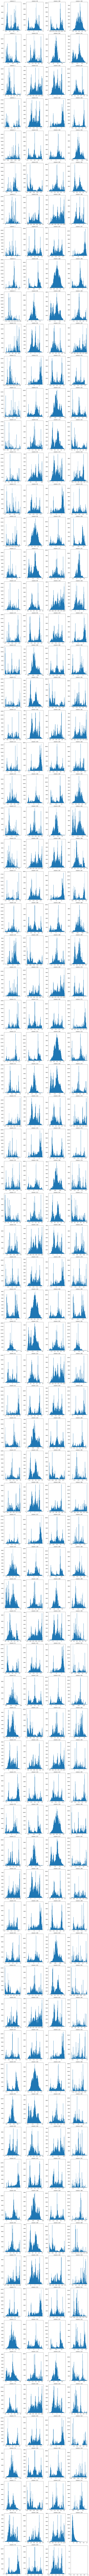

In [8]:
fig, ax = plt.subplots(80,4, figsize=(14,400))
for i in range(df.shape[1]):
    sbplt = ax[i%80, math.floor(i/80)]
    sbplt.hist(df.iloc[:,i], bins =100)
    sbplt.set_title('column: {}'.format(i))
fig.tight_layout()

## Baseline model

#### Splitting the dataset

First of all we split the data and we drop Kmer, this is a string so we cannot use it for machine learning purposes.

In [9]:
df

,y_1,y_2,y_3,y_4,y_5,y_6,zC_1,zC_2,zC_3,zC_4,...,zW_76,zW_77,zW_78,y_79,y_80,y_81,y_82,y_83,y_84,relKa
0,0.593697,-1.092779,0.309117,0.133525,0.023403,-0.157348,1.177586,-2.166888,-1.059702,-0.986852,...,-0.674709,10.019444,-1.012806,-0.790300,-0.112492,0.118705,0.237596,-0.009713,0.267886,1.000000
1,0.790300,-0.112492,0.118705,-0.237596,-0.009713,0.267886,2.591673,-3.422281,-1.331358,-0.674709,...,-0.986852,9.851130,-1.990198,-0.593697,-1.092779,0.309117,-0.133525,0.023403,-0.157348,1.000000
2,0.593690,-1.092780,0.309116,0.133525,0.023403,-0.157348,1.177587,-2.166890,-1.059703,-0.986851,...,-0.839165,10.065669,-1.499679,-0.826872,-1.141872,0.500342,-0.143809,0.043456,0.095141,0.968830
3,0.826872,-1.141872,0.500342,0.143809,0.043456,0.095141,2.137980,-2.777053,-1.371144,-0.839165,...,-0.986851,9.851129,-1.990198,-0.593690,-1.092780,0.309116,-0.133525,0.023403,-0.157348,0.968830
4,1.260372,-0.870861,0.397555,0.124897,0.053255,0.213696,1.977567,-2.851909,-1.221460,-0.880962,...,-0.960712,9.943948,-1.806082,0.336528,-0.596511,0.184099,-0.075285,0.032807,0.149085,0.968752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170576,0.876056,-1.165222,0.321638,0.106295,0.028863,-0.202603,1.139074,-1.939220,-0.782830,-1.156945,...,-0.779331,9.794168,-1.737971,0.085539,-0.955026,0.025427,0.256477,0.048950,0.080873,0.076591
170577,0.585035,-0.150802,0.171198,-0.256918,0.058377,0.181906,1.209817,-3.391274,-1.164594,-0.832287,...,-1.162514,9.929123,-1.934750,-1.023253,-0.926061,0.372899,-0.098051,0.026279,-0.269782,0.073354
170578,1.023253,-0.926061,0.372899,0.098051,0.026279,-0.269782,1.151259,-1.899359,-0.775374,-1.162514,...,-0.832287,9.702945,-1.787255,-0.585035,-0.150802,0.171198,0.256918,0.058377,0.181906,0.073354
170579,-0.413908,-0.828290,0.190382,-0.246474,0.039222,0.122640,0.331353,-3.875098,-2.096984,-0.362874,...,-0.978912,9.863057,-1.994680,-0.735610,-1.194044,0.298711,-0.138674,0.028309,-0.129401,0.073150


Now we divide into training and test data.

In [92]:
y = df['relKa'].to_numpy()
x = df.loc[:, df.columns != 'relKa'].to_numpy()
print(x.shape)

(170581, 318)


In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [71]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform (x_test)

#### Naive model

In [11]:
model = XGBRegressor()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [12]:
print('the MSE for non tuned model XGB Regressor is', MSE(y_test, predictions))

the MSE for non tuned model XGB Regressor is 0.0013181866451271926


The model fits the data pretty well, the MSE seems quite small.

#### Hyperparameters tuning

Now we will tune the hyperparameters to improve the model performances, we will consider the regressor that we obtain after hyperparameter tuning the baseline regressor.

In [17]:
params = { 'max_depth': [5, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.5],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.5, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
           'n_estimators': [100, 500, 1000],
            }
model = XGBRegressor(seed = 20)
clf = RandomizedSearchCV(estimator = model,
                         param_distributions = params,
                         scoring='neg_mean_squared_error',
                         n_iter=10,
                         verbose=10)
clf.fit(x_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START colsample_bylevel=0.5, colsample_bytree=0.7999999999999999, learning_rate=0.5, max_depth=15, n_estimators=100, subsample=0.5
[CV 1/5; 1/10] END colsample_bylevel=0.5, colsample_bytree=0.7999999999999999, learning_rate=0.5, max_depth=15, n_estimators=100, subsample=0.5; total time= 1.5min
[CV 2/5; 1/10] START colsample_bylevel=0.5, colsample_bytree=0.7999999999999999, learning_rate=0.5, max_depth=15, n_estimators=100, subsample=0.5
[CV 2/5; 1/10] END colsample_bylevel=0.5, colsample_bytree=0.7999999999999999, learning_rate=0.5, max_depth=15, n_estimators=100, subsample=0.5; total time= 1.4min
[CV 3/5; 1/10] START colsample_bylevel=0.5, colsample_bytree=0.7999999999999999, learning_rate=0.5, max_depth=15, n_estimators=100, subsample=0.5
[CV 3/5; 1/10] END colsample_bylevel=0.5, colsample_bytree=0.7999999999999999, learning_rate=0.5, max_depth=15, n_estimators=100, subsample=0.5; total time= 1.4min
[CV 4/5; 

[CV 1/5; 6/10] END colsample_bylevel=0.7, colsample_bytree=0.8999999999999999, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.7; total time= 1.6min
[CV 2/5; 6/10] START colsample_bylevel=0.7, colsample_bytree=0.8999999999999999, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.7
[CV 2/5; 6/10] END colsample_bylevel=0.7, colsample_bytree=0.8999999999999999, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.7; total time= 1.6min
[CV 3/5; 6/10] START colsample_bylevel=0.7, colsample_bytree=0.8999999999999999, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.7
[CV 3/5; 6/10] END colsample_bylevel=0.7, colsample_bytree=0.8999999999999999, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.7; total time= 1.6min
[CV 4/5; 6/10] START colsample_bylevel=0.7, colsample_bytree=0.8999999999999999, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.7
[CV 4/5; 6/10] END colsample_bylevel=0.7, colsample_bytree=0.899999999

In [21]:
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Best parameters: {'subsample': 0.8999999999999999, 'n_estimators': 500, 'max_depth': 20, 'learning_rate': 0.01, 'colsample_bytree': 0.7999999999999999, 'colsample_bylevel': 0.6}
Lowest RMSE:  0.028122230919052516


In [57]:
predictions = clf.predict(x_test)

In [58]:
print('the MSE for tuned model XGB Regressor is', MSE(y_test, predictions))

the MSE for tuned model XGB Regressor is 0.0006722612178986927


Best parameters: {'subsample': 0.8999999999999999, 'n_estimators': 500, 'max_depth': 20, 'learning_rate': 0.01, 'colsample_bytree': 0.7999999999999999, 'colsample_bylevel': 0.6}

Lowest RMSE:  0.028122230919052516.

The MSE for tuned model XGB Regressor is 0.0006722612178986927


##### Error analysis

In [22]:
model = XGBRegressor(subsample = 0.8999999999999999, n_estimators= 500,
                     max_depth = 20, learning_rate = 0.01, colsample_bytree = 0.7999999999999999, colsample_bylevel = 0.6)

In [ ]:
predictions = model.predict(x_test)

We analyze the MSE errors for each interval of Relka values (interval of 0.1) to see in which range the model perform worse.

In [75]:
range_values = np.arange(0.05,1.05,0.1)
mse_ranges = []
print(range_values)
for val in range_values:
    labels_range = y[np.where(np.abs(y_test-val)<=0.05)]
    correspondent_predictions = predictions[np.where(np.abs(y_test-val)<=0.05)]
    mse_ranges.append(MSE(correspondent_predictions, labels_range))

[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]


In [76]:
mse_ranges

[0.0408115531911667,
 0.025211499245508005,
 0.014287034764546158,
 0.012100870620588225,
 0.02799396571910806,
 0.05977349605774098,
 0.1016496519378855,
 0.16704499262325456,
 0.25766693630723814,
 0.32796151923386546]

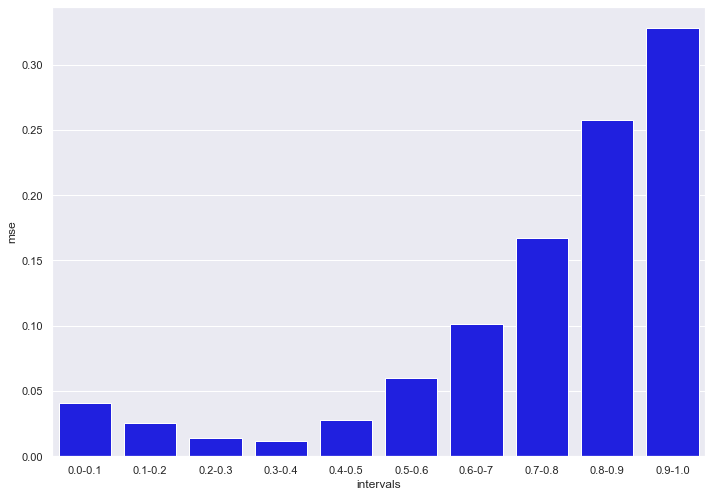

In [94]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
intervals = ['0.0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4','0.4-0.5', '0.5-0.6', '0.6-0-7', '0.7-0.8', '0.8-0.9', '0.9-1.0']
dict_mse = {'intervals': intervals, 'mse': mse_ranges}
df_mse = pd.DataFrame.from_dict(dict_mse)
sns.barplot(x = df_mse['intervals'], y = df_mse['mse'], color='blue')
plt.show()

Our model is not performing properly in the values of Relka bigger than 0.5

### Undersampling

In [ ]:
import random

def undersampling(X, y, ratios, intervals):
    undersampled_training_data = np.zeros(training_data.shape[1])
    undersampled_training_data = undersampled_training_data[..., np.newaxis].T
    undersampled_RelKa = np.array([])
    for i in range(len(intervals)-1):
        indices = np.where(np.logical_and(intervals[i] <= RelKa, RelKa <= intervals[i+1]))[0]
        sample_length = np.int(ratios[i]*len(indices))
        random_picked = random.sample(list(np.arange(0, len(indices) + 1)), sample_length)
        training_to_add = training_data[indices[0] + random_picked, :]
        undersampled_training_data = np.concatenate([undersampled_training_data, training_to_add], axis=0)
        RelKa_to_add = RelKa[indices[0] + random_picked]
        undersampled_RelKa = np.concatenate([undersampled_RelKa, RelKa_to_add], axis=0)
    critical_indices = np.where(RelKa >= 0.7)[0]
    critical_RelKa = RelKa[critical_indices]
    critical_samples = training_data[critical_indices, :]
    undersampled_training_data = np.concatenate([undersampled_training_data, critical_samples], axis=0)
    undersampled_RelKa = np.concatenate([undersampled_RelKa, critical_RelKa], axis=0)
    undersampled_training_data = np.delete(undersampled_training_data, 0, axis=0)
    return undersampled_training_data, undersampled_RelKa

In [ ]:
ratios = np.array([0.1])
intervals = 0.2 * np.arange(0, 2)
undersampled_x, undersampled_y = undersampling(x, y, ratios, intervals)

In [ ]:
x_train_under, x_test_under, y_train_under, y_test_under = train_test_split(undersampled_x, undersampled_y,
                                                                            test_size=0.30, random_state=42)

In [ ]:
sc = StandardScaler()
x_train_under = sc.fit_transform(x_train_under)
x_test_under = sc.transform (x_test_under)

In [ ]:
model = XGBRegressor(subsample = 0.8999999999999999, n_estimators= 500,
                     max_depth = 20, learning_rate = 0.01, colsample_bytree = 0.7999999999999999, colsample_bylevel = 0.6)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [ ]:
predictions = sci.special.inv_boxcox(predictions, lmbda)
y_test = sci.special.inv_boxcox(y_test, lmbda)
print('the MSE for tuned model XGB Regressor is', MSE(y_test, predictions))

In [ ]:
range_values = np.arange(0.05,1.05,0.1)
mse_ranges = []
print(range_values)
for val in range_values:
    labels_range = y[np.where(np.abs(y_test-val)<=0.05)]
    correspondent_predictions = predictions[np.where(np.abs(y_test-val)<=0.05)]
    mse_ranges.append(MSE(correspondent_predictions, labels_range))
sns.set(rc={'figure.figsize':(11.7,8.27)})
intervals = ['0.0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4','0.4-0.5', '0.5-0.6', '0.6-0-7', '0.7-0.8', '0.8-0.9', '0.9-1.0']
dict_mse = {'intervals': intervals, 'mse': mse_ranges}
df_mse = pd.DataFrame.from_dict(dict_mse)
sns.barplot(x = df_mse['intervals'], y = df_mse['mse'], color='blue')
plt.show()

### Reduce the skewed distribution in y variable

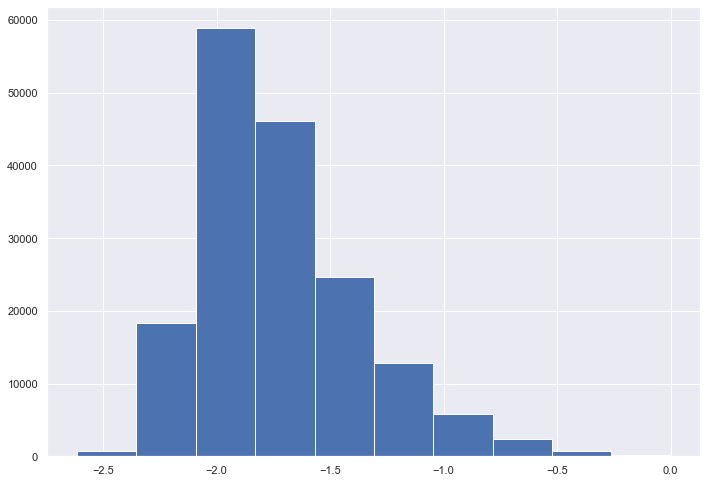

In [31]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(np.log(y))
plt.show()

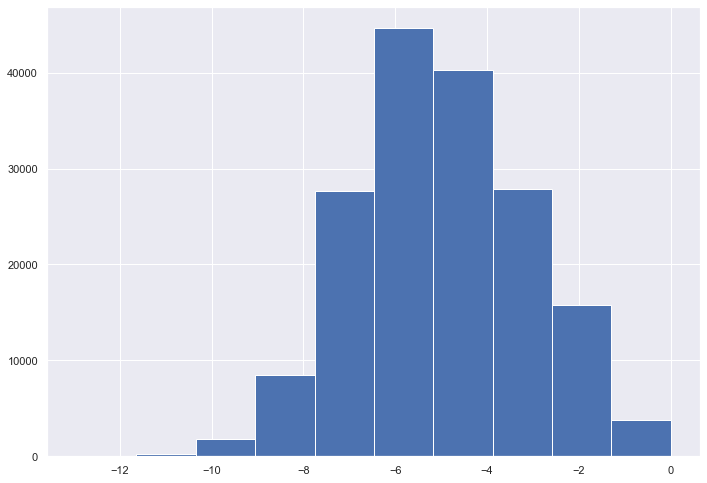

In [32]:
new_y = stats.boxcox(df['relKa'])[0]
plt.hist(new_y)
plt.show()

##### Boxcox transformation

In [10]:
print(df['relKa'].skew())
print(np.log(df['relKa']).skew())
print(pd.Series(stats.boxcox(df['relKa'])[0]).skew())

2.490763117101778
1.003303484513384
0.0561708566014255


We will apply boxcox to y and we will see if there is any improvement in the model.

In [11]:
lmbda = stats.boxcox(df['relKa'])[1]
df.relKa = stats.boxcox(df['relKa'], lmbda = lmbda)
print(lmbda)

-1.0110641734802481


In [12]:
df

,y_1,y_2,y_3,y_4,y_5,y_6,zC_1,zC_2,zC_3,zC_4,...,zW_76,zW_77,zW_78,y_79,y_80,y_81,y_82,y_83,y_84,relKa
0,0.593697,-1.092779,0.309117,0.133525,0.023403,-0.157348,1.177586,-2.166888,-1.059702,-0.986852,...,-0.674709,10.019444,-1.012806,-0.790300,-0.112492,0.118705,0.237596,-0.009713,0.267886,0.000000
1,0.790300,-0.112492,0.118705,-0.237596,-0.009713,0.267886,2.591673,-3.422281,-1.331358,-0.674709,...,-0.986852,9.851130,-1.990198,-0.593697,-1.092779,0.309117,-0.133525,0.023403,-0.157348,0.000000
2,0.593690,-1.092780,0.309116,0.133525,0.023403,-0.157348,1.177587,-2.166890,-1.059703,-0.986851,...,-0.839165,10.065669,-1.499679,-0.826872,-1.141872,0.500342,-0.143809,0.043456,0.095141,-0.032178
3,0.826872,-1.141872,0.500342,0.143809,0.043456,0.095141,2.137980,-2.777053,-1.371144,-0.839165,...,-0.986851,9.851129,-1.990198,-0.593690,-1.092780,0.309116,-0.133525,0.023403,-0.157348,-0.032178
4,1.260372,-0.870861,0.397555,0.124897,0.053255,0.213696,1.977567,-2.851909,-1.221460,-0.880962,...,-0.960712,9.943948,-1.806082,0.336528,-0.596511,0.184099,-0.075285,0.032807,0.149085,-0.032262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170576,0.876056,-1.165222,0.321638,0.106295,0.028863,-0.202603,1.139074,-1.939220,-0.782830,-1.156945,...,-0.779331,9.794168,-1.737971,0.085539,-0.955026,0.025427,0.256477,0.048950,0.080873,-12.296814
170577,0.585035,-0.150802,0.171198,-0.256918,0.058377,0.181906,1.209817,-3.391274,-1.164594,-0.832287,...,-1.162514,9.929123,-1.934750,-1.023253,-0.926061,0.372899,-0.098051,0.026279,-0.269782,-12.889607
170578,1.023253,-0.926061,0.372899,0.098051,0.026279,-0.269782,1.151259,-1.899359,-0.775374,-1.162514,...,-0.832287,9.702945,-1.787255,-0.585035,-0.150802,0.171198,0.256918,0.058377,0.181906,-12.889607
170579,-0.413908,-0.828290,0.190382,-0.246474,0.039222,0.122640,0.331353,-3.875098,-2.096984,-0.362874,...,-0.978912,9.863057,-1.994680,-0.735610,-1.194044,0.298711,-0.138674,0.028309,-0.129401,-12.928762


In [13]:
y = df['relKa'].to_numpy()
x = df.loc[:, df.columns != 'relKa'].to_numpy()
print(x.shape)

(170581, 318)


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [17]:
model = XGBRegressor(subsample = 0.8999999999999999, n_estimators= 500,
                     max_depth = 20, learning_rate = 0.01, colsample_bytree = 0.7999999999999999, colsample_bylevel = 0.6)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

Best parameters: {'subsample': 0.6, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.7999999999999999, 'colsample_bylevel': 0.7999999999999999}
Lowest RMSE:  0.7770145863738024 ---> error 

In [ ]:
#regressor = XGBRegressor(subsample = 0.6, n_estimators= 1000,
#                     max_depth = 10, learning_rate = 0.1, colsample_bytree = 0.7999999999999999, colsample_bylevel = 0.7999999999999999)
#regressor.fit(x_train, y_train)
#predictions = regressor.predict(x_test)

In [18]:
predictions = sci.special.inv_boxcox(predictions, lmbda)

In [19]:
print(x_train.shape)
print(x_test.shape)

(119406, 318)
(51175, 318)


In [20]:
y_test = sci.special.inv_boxcox(y_test, lmbda)

In [21]:
print('the MSE for tuned model XGB Regressor is', MSE(y_test, predictions))

the MSE for tuned model XGB Regressor is 0.0008360246821241151


In [22]:
y = sci.special.inv_boxcox(y , lmbda)

[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]


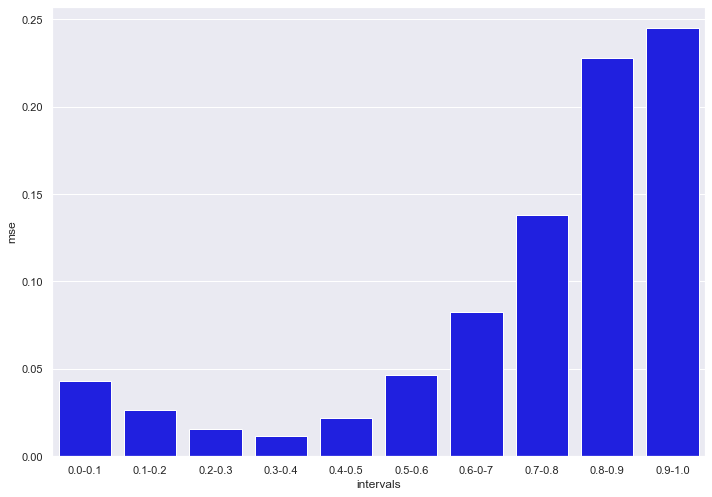

In [23]:
range_values = np.arange(0.05,1.05,0.1)
mse_ranges = []
print(range_values)
for val in range_values:
    labels_range = y[np.where(np.abs(y_test-val)<=0.05)]
    correspondent_predictions = predictions[np.where(np.abs(y_test-val)<=0.05)]
    mse_ranges.append(MSE(correspondent_predictions, labels_range))
sns.set(rc={'figure.figsize':(11.7,8.27)})
intervals = ['0.0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4','0.4-0.5', '0.5-0.6', '0.6-0-7', '0.7-0.8', '0.8-0.9', '0.9-1.0']
dict_mse = {'intervals': intervals, 'mse': mse_ranges}
df_mse = pd.DataFrame.from_dict(dict_mse)
sns.barplot(x = df_mse['intervals'], y = df_mse['mse'], color='blue')
plt.show()

Without retuning the overall MSE is 0.0008 and it stays always below 0.25

##### Log transformation

In [24]:
df = pd.read_csv('data\GSM1586785_ScrH-12A_Exd_14mer_cg.csv')
df.drop(columns = 'Unnamed: 0', inplace = True)
df.drop(columns = 'Kmer', inplace = True)
y = df['relKa'].to_numpy()
x = df.loc[:, df.columns != 'relKa'].to_numpy()

In [25]:
# y scaling
y = np.log(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform (x_test)

In [26]:
model = XGBRegressor(subsample = 0.8999999999999999, n_estimators= 500,
                     max_depth = 20, learning_rate = 0.01, colsample_bytree = 0.7999999999999999, colsample_bylevel = 0.6)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [27]:
predictions = np.exp(predictions)
y_test = np.exp(y_test)
print('the MSE for tuned model XGB Regressor is', MSE(y_test, predictions))
y = np.exp(y)

the MSE for tuned model XGB Regressor is 0.0006647994948999547


[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]


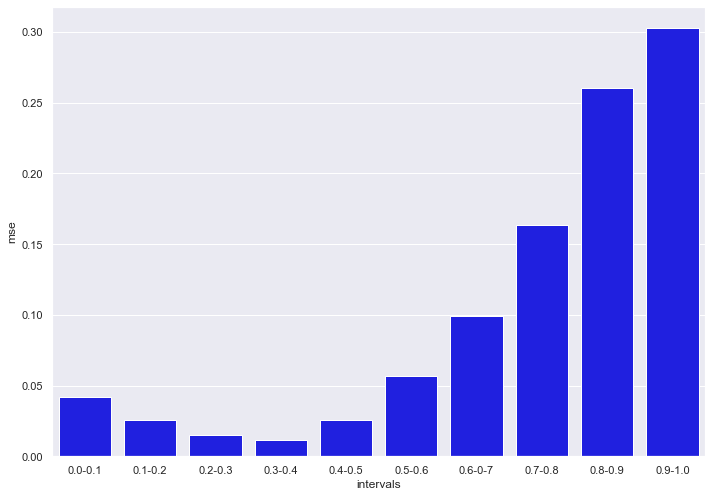

In [28]:
range_values = np.arange(0.05,1.05,0.1)
mse_ranges = []
print(range_values)
for val in range_values:
    labels_range = y[np.where(np.abs(y_test-val)<=0.05)]
    correspondent_predictions = predictions[np.where(np.abs(y_test-val)<=0.05)]
    mse_ranges.append(MSE(correspondent_predictions, labels_range))
sns.set(rc={'figure.figsize':(11.7,8.27)})
intervals = ['0.0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4','0.4-0.5', '0.5-0.6', '0.6-0-7', '0.7-0.8', '0.8-0.9', '0.9-1.0']
dict_mse = {'intervals': intervals, 'mse': mse_ranges}
df_mse = pd.DataFrame.from_dict(dict_mse)
sns.barplot(x = df_mse['intervals'], y = df_mse['mse'], color='blue')
plt.show()

Without retuning the overall MSE is 0.0006 and it stays always below 0.31

### Outliers remotion

In [33]:
# Worse performances

from sklearn.ensemble import IsolationForest

def Anomaly_Detection_Isolation_Forests(x, change_split=True):
  random_state = np.random.RandomState(42)
  contamination = 'auto'
  threshold = np.random.uniform(-0.03, -0.02, 1)
  model = IsolationForest(n_estimators=120, max_samples='auto', contamination=contamination, random_state=random_state)
  model.fit(x)
  scores = model.decision_function(x)
  if change_split == False:
    anomaly_score = model.predict(x)
    outliers_indices = np.where(anomaly_score == -1)[0]
  if change_split == True:
    outliers_indices = split_outliers(threshold, scores)
  return contamination, scores, outliers_indices

def check_Isolation_Forests(contamination, outliers_indices):
  """
  Simply a check on the proper working of the IF algorithm
  """
  tol = 1.0e-02
  if contamination != 'auto':
    outliers_percentage = 1 / len(RelKa) * len(outliers_indices)
    assert np.abs(contamination-outliers_percentage) < tol

def check_boundary_decision(scores, p, verbose=1):
  """
  This function simply controls how many scores returned by the IF algorithm 
  are likely to be misclassified
  """
  indecision_percentage = 1 / len(y) * np.count_nonzero(np.abs(scores) <= p)
  if verbose == 1:
    plt.hist(scores)
    plt.show()
    print("The indecision percentage around", p,  "is", indecision_percentage)
    print("The percentage of outliers detected is", 1 / len(scores) * len(np.where(scores < 0)[0]))

def drop_outliers(x, y, outliers):
  x = np.delete(x, outliers, axis=0)
  y = np.delete(y, outliers, axis=0)
  return x, y

In [34]:
df = pd.read_csv('data\GSM1586785_ScrH-12A_Exd_14mer_cg.csv')
df.drop(columns = 'Unnamed: 0', inplace = True)
df.drop(columns = 'Kmer', inplace = True)
y = df['relKa'].to_numpy()
x = df.loc[:, df.columns != 'relKa'].to_numpy()

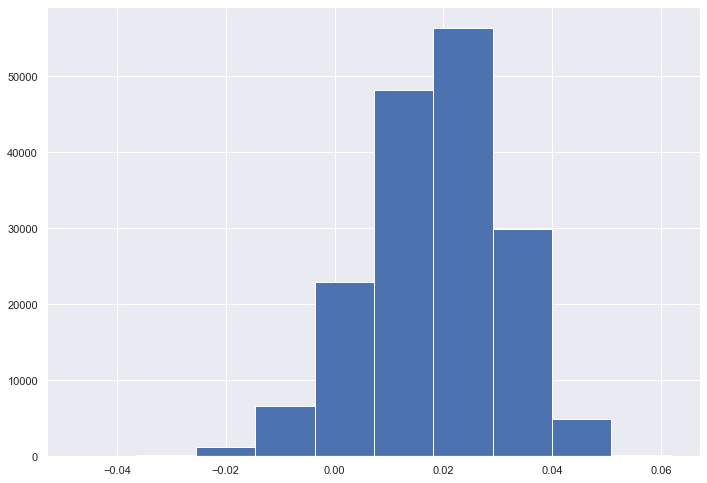

The indecision percentage around 0.02 is 0.5208317456223144
The percentage of outliers detected is 0.0773825924340929


In [35]:
contamination, scores, outliers_indices = Anomaly_Detection_Isolation_Forests(x, change_split=False)
check_Isolation_Forests(contamination, outliers_indices)
check_boundary_decision(scores, 0.02, verbose=1)

In [36]:
y[outliers_indices].shape[0]

13200

In [37]:
np.sum(y[outliers_indices]>=0.8)
# There are just three points (outliers) with relKa above 0.8

3

Not too many outliers with a big value of Relka, so the model will have enough data to continue learning from it.

In [38]:
x, y = drop_outliers(x, y, outliers_indices)

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [40]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform (x_test)

In [41]:
model = XGBRegressor(subsample = 0.8999999999999999, n_estimators= 500,
                     max_depth = 20, learning_rate = 0.01, colsample_bytree = 0.7999999999999999, colsample_bylevel = 0.6)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [42]:
predictions = sci.special.inv_boxcox(predictions, lmbda)
y_test = sci.special.inv_boxcox(y_test, lmbda)
print('the MSE for tuned model XGB Regressor is', MSE(y_test, predictions))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
y = sci.special.inv_boxcox(y , lmbda)

In [ ]:
range_values = np.arange(0.05,1.05,0.1)
mse_ranges = []
print(range_values)
for val in range_values:
    labels_range = y[np.where(np.abs(y_test-val)<=0.05)]
    correspondent_predictions = predictions[np.where(np.abs(y_test-val)<=0.05)]
    mse_ranges.append(MSE(correspondent_predictions, labels_range))
sns.set(rc={'figure.figsize':(11.7,8.27)})
intervals = ['0.0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4','0.4-0.5', '0.5-0.6', '0.6-0-7', '0.7-0.8', '0.8-0.9', '0.9-1.0']
dict_mse = {'intervals': intervals, 'mse': mse_ranges}
df_mse = pd.DataFrame.from_dict(dict_mse)
sns.barplot(x = df_mse['intervals'], y = df_mse['mse'], color='blue')
plt.show()

### Features importance

In [14]:
model = XGBRegressor(subsample = 0.8999999999999999, n_estimators = 500, max_depth = 20, learning_rate = 0.01,
                     colsample_bytree = 0.7, colsample_bylevel = 0.5)

In [15]:
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print('the MSE for tuned model XGB Regressor is', MSE(y_test, predictions))

the MSE for tuned model XGB Regressor is 0.000528777200087453


[0.00056685 0.00035964 0.00064565 0.0004532  0.00068162 0.00061232
 0.00054091 0.0006069  0.00055609 0.00071616 0.00160098 0.00081331
 0.00076779 0.00161457 0.0009222  0.00059533 0.00133548 0.00059727
 0.0014745  0.00095433 0.0018902  0.00297007 0.00138254 0.00098594
 0.00218224 0.00132351 0.00147746 0.00148465 0.00095547 0.00270205
 0.00209617 0.00261229 0.00092491 0.00218271 0.00295038 0.00141939
 0.00171569 0.00292031 0.00122903 0.00226959 0.00428319 0.00074809
 0.00106957 0.00180449 0.00727628 0.00242156 0.00939989 0.00144659
 0.00196826 0.00139069 0.00153649 0.00344322 0.00115534 0.00109447
 0.00250267 0.00196848 0.00215652 0.00261883 0.00446608 0.00224001
 0.0029372  0.00529448 0.0023778  0.00345929 0.00584637 0.00091562
 0.00276964 0.0038194  0.00747051 0.00337109 0.00297431 0.00174315
 0.00251194 0.00162042 0.00150989 0.00411234 0.00137202 0.00124903
 0.00574644 0.00222753 0.00234731 0.00406194 0.00124703 0.00218537
 0.00363604 0.00342176 0.00190854 0.0026288  0.00248006 0.0032

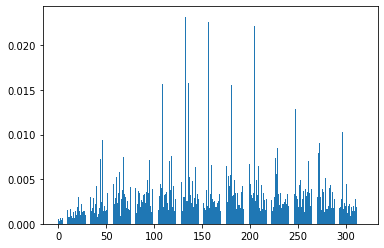

In [16]:
print(model.feature_importances_)
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

Some features are way less important than others

In [17]:
list_indices = np.arange(0,318)
dic = dict(zip(list_indices, model.feature_importances_))
dic

{0: 0.0005668484,
 1: 0.00035963854,
 2: 0.00064565364,
 3: 0.0004532024,
 4: 0.00068162073,
 5: 0.0006123159,
 6: 0.00054091227,
 7: 0.00060690154,
 8: 0.00055608735,
 9: 0.00071615796,
 10: 0.001600977,
 11: 0.0008133138,
 12: 0.0007677948,
 13: 0.0016145733,
 14: 0.00092219946,
 15: 0.0005953321,
 16: 0.0013354791,
 17: 0.000597269,
 18: 0.0014744952,
 19: 0.00095432915,
 20: 0.0018901973,
 21: 0.0029700673,
 22: 0.0013825436,
 23: 0.0009859399,
 24: 0.0021822404,
 25: 0.0013235107,
 26: 0.0014774575,
 27: 0.001484646,
 28: 0.00095546996,
 29: 0.0027020543,
 30: 0.0020961703,
 31: 0.002612291,
 32: 0.00092490617,
 33: 0.002182706,
 34: 0.0029503752,
 35: 0.0014193861,
 36: 0.0017156883,
 37: 0.0029203135,
 38: 0.0012290304,
 39: 0.0022695858,
 40: 0.004283192,
 41: 0.0007480882,
 42: 0.0010695695,
 43: 0.0018044948,
 44: 0.007276279,
 45: 0.0024215593,
 46: 0.009399887,
 47: 0.0014465887,
 48: 0.0019682555,
 49: 0.0013906944,
 50: 0.0015364895,
 51: 0.0034432192,
 52: 0.0011553357,


In [18]:
sorted_dict = dict(sorted(dic.items(), key=lambda item: item[1]))
sorted_dict

{1: 0.00035963854,
 3: 0.0004532024,
 6: 0.00054091227,
 8: 0.00055608735,
 0: 0.0005668484,
 15: 0.0005953321,
 17: 0.000597269,
 7: 0.00060690154,
 5: 0.0006123159,
 2: 0.00064565364,
 4: 0.00068162073,
 9: 0.00071615796,
 41: 0.0007480882,
 12: 0.0007677948,
 269: 0.0007996705,
 11: 0.0008133138,
 305: 0.00086246605,
 292: 0.000913065,
 65: 0.000915615,
 14: 0.00092219946,
 32: 0.00092490617,
 19: 0.00095432915,
 28: 0.00095546996,
 23: 0.0009859399,
 125: 0.0010545973,
 42: 0.0010695695,
 53: 0.0010944671,
 52: 0.0011553357,
 302: 0.0011579114,
 199: 0.001213566,
 38: 0.0012290304,
 82: 0.0012470296,
 77: 0.0012490333,
 100: 0.0012959203,
 97: 0.0013137336,
 25: 0.0013235107,
 16: 0.0013354791,
 172: 0.0013363091,
 278: 0.0013408853,
 267: 0.0013624099,
 241: 0.0013679083,
 257: 0.0013691039,
 76: 0.0013720191,
 22: 0.0013825436,
 121: 0.0013891481,
 49: 0.0013906944,
 211: 0.001406792,
 126: 0.0014170196,
 35: 0.0014193861,
 130: 0.0014202746,
 309: 0.0014371497,
 307: 0.001443607

Features to remove

In [19]:
features_to_remove = []
count=0
for el in sorted_dict.keys():
    count = count+1
    features_to_remove.append(el)
    if count==10:
        break
features_to_remove

[1, 3, 6, 8, 0, 15, 17, 7, 5, 2]

In [20]:
x_train_new = np.delete(x_train, features_to_remove, axis=1)

In [21]:
x_test_new = np.delete(x_test, features_to_remove, axis =1)

In [22]:
model.fit(x_train_new, y_train)
predictions = model.predict(x_test_new)
print('the MSE for tuned model XGB Regressor is', MSE(y_test, predictions))

C:\Users\Luca\anaconda3\envs\introml\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


the MSE for tuned model XGB Regressor is 0.0005390284100400362


Model performances goes from 0.000528 to 0.000539

### PCA

We will try with a PCA keeping all features which explain 95% of the variance

In [26]:
pca = PCA(0.95)

In [27]:
pca.fit(x_train)

PCA(n_components=0.95)

In [28]:
x_train_reducted = pca.transform(x_train)
x_test_reducted = pca.transform(x_test)

In [29]:
x_train_reducted.shape 

(110166, 44)

We are just left with 44 features, we performed a great dimensionality reduction.

In [30]:
model.fit(x_train_reducted, y_train)
predictions = model.predict(x_test_reducted)

In [31]:
print('the MSE for tuned model XGB Regressor when applied PCA is', MSE(y_test, predictions))

the MSE for tuned model XGB Regressor when applied PCA is 0.0030734536207001734


The accuracy seems decreased, but what if we perform an hyperparameter tuning ?

In [32]:
#params = { 'max_depth': [3, 5, 6, 10, 15, 20],
#           'learning_rate': [0.01, 0.1, 0.2, 0.3],
#           'subsample': np.arange(0.5, 1.0, 0.1),
#           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
#           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
#           'n_estimators': [100, 500, 1000],
#            }
#model = XGBRegressor(seed = 20)
#clf = RandomizedSearchCV(estimator = model,
#                         param_distributions = params,
#                         scoring='neg_mean_squared_error',
#                         n_iter=15,
#                         verbose=10)
#clf.fit(x_train, y_train)
#print("Best parameters:", clf.best_params_)
#print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

In [33]:
#print("Best parameters:", clf.best_params_)
#print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Decrease in performaces.

What if we try to decrease the dimensionality reduction ?

In [34]:
pca = PCA(.99)
pca.fit(x_train)

PCA(n_components=0.99)

In [35]:
x_train_reduced = pca.transform(x_train)
x_test_reduced = pca.transform(x_test)
print(x_train_reduced.shape)

(110166, 79)


In [36]:
model.fit(x_train_reduced, y_train)
predictions = model.predict(x_test_reduced)
print('the MSE for tuned model XGB Regressor when applied PCA is', MSE(y_test, predictions))

the MSE for tuned model XGB Regressor when applied PCA is 0.0030027696692280985


Still the performance decreased

In [ ]:
#params = { 'max_depth': [3, 5, 6, 10, 15, 20],
#           'learning_rate': [0.01, 0.1, 0.2, 0.3],
#           'subsample': np.arange(0.5, 1.0, 0.1),
#           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
#           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
#           'n_estimators': [100, 500, 1000],
#            }
#model = XGBRegressor(seed = 20)
#clf = RandomizedSearchCV(estimator = model,
#                         param_distributions = params,
#                         scoring='neg_mean_squared_error',
#                         n_iter=15,
#                         verbose=10)
#clf.fit(x_train, y_train)
#print("Best parameters:", clf.best_params_)
#print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

In [ ]:
#print("Best parameters:", clf.best_params_)
#print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

In [38]:
pca = PCA(n_components=200)
pca.fit(x_train)

PCA(n_components=200)

In [39]:
x_train_reduced = pca.transform(x_train)
x_test_reduced = pca.transform(x_test)
print(x_train_reduced.shape)

(110166, 200)


In [40]:
model.fit(x_train_reduced, y_train)
predictions = model.predict(x_test_reduced)
print('the MSE for tuned model XGB Regressor when applied PCA is', MSE(y_test, predictions))

the MSE for tuned model XGB Regressor when applied PCA is 0.0029795928714100436


### Kernel PCA

In [41]:
from sklearn.decomposition import KernelPCA

In [52]:
kernel_pca = KernelPCA(n_components =200, kernel ='poly')
kernel_pca.fit(x_train)

MemoryError: Unable to allocate 90.4 GiB for an array with shape (110166, 110166) and data type float64

In [ ]:
x_train_reduced = kernel_pca.transform(x_train)
x_test_reduced = kernel_pca.transform(x_test)
print(x_train_reduced.shape)

In [ ]:
model.fit(x_train_reduced, y_train)
predictions = model.predict(x_test_reduced)
print('the MSE for tuned model XGB Regressor when applied PCA is', MSE(y_test, predictions))

### PCA for visualization

In [23]:
pca = PCA(n_components=2)
pca.fit(x_train)

PCA(n_components=2)

In [24]:
x_train_reduced = pca.transform(x_train)
x_test_reduced = pca.transform(x_test)
print(x_train_reduced.shape)

(119406, 2)


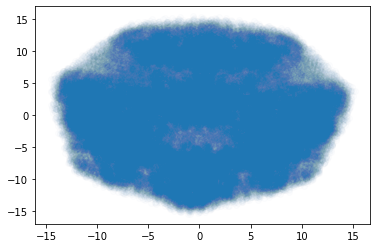

In [31]:
plt.scatter(x_train_reduced[:,0], x_train_reduced[:,1], alpha= 0.01)
plt.show()

In [32]:
model.fit(x_train_reduced, y_train)
predictions = model.predict(x_test_reduced)
print('the MSE for tuned model XGB Regressor when applied PCA is', MSE(y_test, predictions))

the MSE for tuned model XGB Regressor when applied PCA is 0.008470465487355545


### Try unsupervised learning before supervised learning

In [38]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [39]:
from sklearn.cluster import KMeans, DBSCAN
def plot_sse(features_X, start=2, end=11):
    sse = []
    for k in range(start, end):
        # Assign the labels to the clusters
        kmeans = KMeans(n_clusters=k, random_state=10).fit(features_X)
        sse.append({"k": k, "sse": kmeans.inertia_})

    sse = pd.DataFrame(sse)
    # Plot the data
    plt.plot(sse.k, sse.sse)
    plt.xlabel("K")
    plt.ylabel("Sum of Squared Errors")

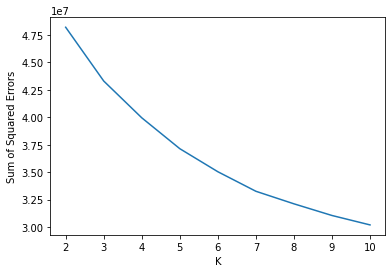

In [40]:
plot_sse(x)

In [42]:
labels = KMeans(n_clusters=7 , random_state=0).fit_predict(x)

In [63]:
x = np.insert(x, 0, labels, axis=1)

In [64]:
x.shape

(170581, 319)

In [65]:
print(x)

[[ 0.          0.59369733 -1.09277858 ...  0.23759618 -0.00971266
   0.26788621]
 [ 0.          0.79030033 -0.11249168 ... -0.13352452  0.02340325
  -0.15734798]
 [ 0.          0.59369049 -1.09278023 ... -0.14380936  0.0434557
   0.09514079]
 ...
 [ 5.          1.02325267 -0.92606082 ...  0.25691816  0.05837746
   0.18190625]
 [ 2.         -0.41390827 -0.8282898  ... -0.13867362  0.02830888
  -0.12940081]
 [ 4.          0.73560956 -1.19404371 ...  0.24647372  0.03922209
   0.12264047]]


In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [68]:
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print('the MSE for tuned model XGB Regressor is', MSE(y_test, predictions))

the MSE for tuned model XGB Regressor is 0.0005420949756061396


Worse performance